In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

DIR = '/network/home/zhangire/rl-learn/'

In [2]:
def get_nums(line):
    tmp = line[11:]
    timestep = int(tmp.split(',')[0])
    goals_acheived = int(tmp.split(',')[1][16:].split('/')[0])
    goals_total = int(tmp.split(',')[1][16:].split('/')[1])
    percentage = float(tmp.split(',')[2][12:].split('\n')[0])

    return (timestep, goals_acheived, goals_total, percentage)

In [3]:
all_files = []
for file in os.listdir(DIR):
    if file.startswith("infer_"):
        file_name = open(DIR+file, 'r')
        lines = file_name.readlines()
        if len(lines) < 10: #check files are not empty
            print (str(file))
            continue
        all_files.append(file)

In [4]:
xs = []
file = all_files[0]
file = open(DIR+file, 'r') 
lines = file.readlines()[:-27]
for l in lines:
    xs.append(get_nums(l)[0])

train_len = len(xs)

In [5]:
def get_goals(file):
    goals = [] 
    file = open(DIR+file, 'r') 
    lines = file.readlines()[:train_len]
    for l in lines:
        goals.append(get_nums(l)[1])
    return goals
    


In [6]:
def compute_area(xs , ys , max_steps=500000.):
    area = 0
    x = [0]
    y = [0]
    for i in range(len(xs)):
        x.append(xs[i])
        y.append(ys[i])
        area += (y[-1] + y[-2])/2.0 * (x[-1] - x[-2])
        if x[-1] >= max_steps:
            break
    return (area / max_steps)

In [7]:
def get_mean_area(task, hyp):

    files = []

    for file in all_files:
        if file.startswith("infer_"+str(task)):
            if file.endswith(str(hyp)+"_seed1.txt") or file.endswith(str(hyp)+"_seed2.txt") or file.endswith(str(hyp)+"_seed3.txt"):
                files.append(file)

    areas = []
    for file in files:
        goals = get_goals(file)
        areas.append(compute_area(xs, goals))

    return np.mean(areas)

# select hyper-parameter

In [8]:
print (get_mean_area(4, 1)+get_mean_area(14, 1)) # 2
print (get_mean_area(4, 0.1)+get_mean_area(14, 0.1)) # 1
print (get_mean_area(4, 0.01)+get_mean_area(14, 0.01)) # 3

5692.678762666667
5847.068444444444
5538.28908088889


# lambda = 0.1

In [9]:
def get_policy_acc(exp_id=4, hyp='1.0'):
    
    accuracy_files = []
    for file in os.listdir(DIR):
        if file.startswith("infer_"+str(exp_id)):
            if file.endswith(hyp+"_seed1.txt") or file.endswith(hyp+"_seed2.txt") or file.endswith(hyp+"_seed3.txt"):
                file_name = open(DIR+file, 'r') 
                accuracy_files.append(file)
    
    accs = []
    for file in accuracy_files:
        file = open(DIR+file, 'r') 
        line = file.readlines()[-2][9:]
        accs.append(get_nums(line)[-2])
    accs = np.array(accs)
    
    accs2 = []
    for file in accuracy_files:
        file = open(DIR+file, 'r') 
        line = file.readlines()[-2][9:]
        accs2.append(get_nums(line)[-1])
    accs2 = np.array(accs2)
    return (np.mean(accs), np.mean(accs2))

In [10]:
def get_plot(exp_id=4, hyp='1.0'):
    
    accuracy_files = []
    for file in os.listdir(DIR):
        if file.startswith("infer_"+str(exp_id)):
            if file.endswith(hyp+"_seed1.txt") or file.endswith(hyp+"_seed2.txt") or file.endswith(hyp+"_seed3.txt"):
                file_name = open(DIR+file, 'r') 
                accuracy_files.append(file)
                
    goals_runs = []

    for file in accuracy_files:
        goals = []
        file = open(DIR+file, 'r') 
        lines = file.readlines()[:-27]
        for l in lines:
            goals.append(get_nums(l)[1])
        goals_runs.append(goals)
    
    goals_runs = np.array(goals_runs)
    means = np.mean(goals_runs, axis=0)
    max_means = np.max(goals_runs, axis=0)
    min_means = np.min(goals_runs, axis=0)

    
    #0
    accuracy_files = []
    for file in os.listdir(DIR):
        if file.startswith("infer_"+str(exp_id)):
            if file.endswith("0.0_seed1.txt") or file.endswith("0.0_seed2.txt") or file.endswith("0.0_seed3.txt"):
                file_name = open(DIR+file, 'r') 
                lines = file_name.readlines()
                if len(lines) < 10:
                    continue
                accuracy_files.append(file)
                
    goals_runs = []

    for file in accuracy_files:
        goals = []
        file = open(DIR+file, 'r') 
        lines = file.readlines()[:-19]
        for l in lines:
            goals.append(get_nums(l)[1])
        goals_runs.append(goals)
    
    goals_runs = np.array(goals_runs)
    means_0 = np.mean(goals_runs, axis=0)
    max_means_0 = np.max(goals_runs, axis=0)
    min_means_0 = np.min(goals_runs, axis=0)
    
    
    
    plt.fill_between(xs, min_means, max_means, color='orange', alpha=.15)
    plt.plot(xs, means, color='orange', label = 'Ext+Lang')
    
    plt.fill_between(xs, min_means_0, max_means_0, color='blue', alpha=.15)
    plt.plot(xs, means_0, color='blue', label = 'Ext')
    plt.title('Task %d' %(exp_id))
    plt.ylabel('Number of successful episodes')
    plt.xlabel('Number of time steps')
    plt.legend(loc="upper left")

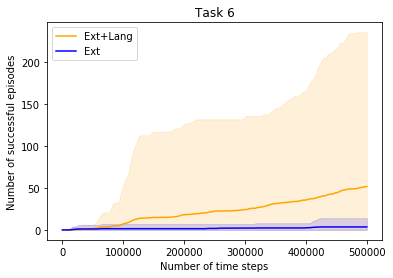

In [18]:
get_plot(exp_id=6, hyp='0.1')

In [11]:
get_policy_acc(exp_id=6, hyp='0.1')

(12797.666666666666, 0.004448255396625071)

In [12]:
get_policy_acc(exp_id=6, hyp='0.0')

(6382.888888888889, 0.0006437430891059143)